In [14]:
from keras.applications import VGG16
import os
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator 
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model

In [11]:
model = load_model('cats_and_dogs_small.h5')

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [13]:
img_path = '/home/a/Downloads/cats_and_dogs_small/test/cats/cat.1002.jpg'


In [17]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [18]:
print(img_tensor.shape)

(1, 150, 150, 3)


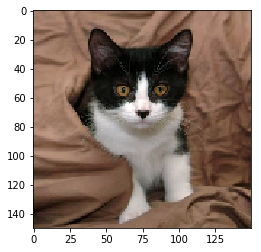

In [20]:
plt.imshow(img_tensor[0])
plt.show()

In [66]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)

In [67]:
activation = activation_model.predict(img_tensor)

In [52]:
print(len(activation))
print(activation[0].shape)
print(activation[1].shape)
print(activation[2].shape)
print(activation[-1].shape)


8
(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 7, 7, 128)


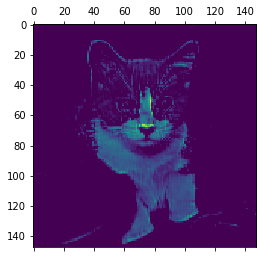

In [54]:
first_layer_activation = activation[0]

plt.matshow(first_layer_activation[0,:,:,0], cmap='viridis')

In [81]:
print(first_layer_activation.shape)
print(first_layer_activation.shape[-1])
print(first_layer_activation.shape[1])


(1, 148, 148, 32)
32
148


In [44]:
layer_names = []

In [46]:
for layer in model.layers[:8]:
    layer_names.append(layer.name)

In [47]:
print(layer_names)

['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4']


In [64]:
images_per_row = 16

conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4


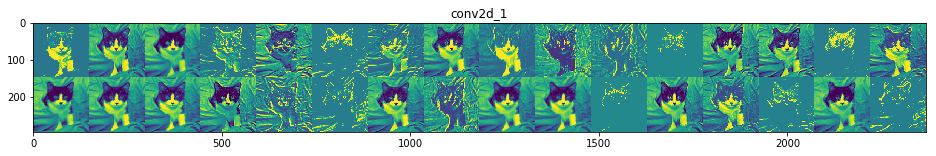

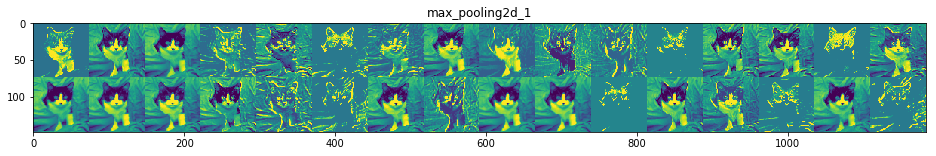

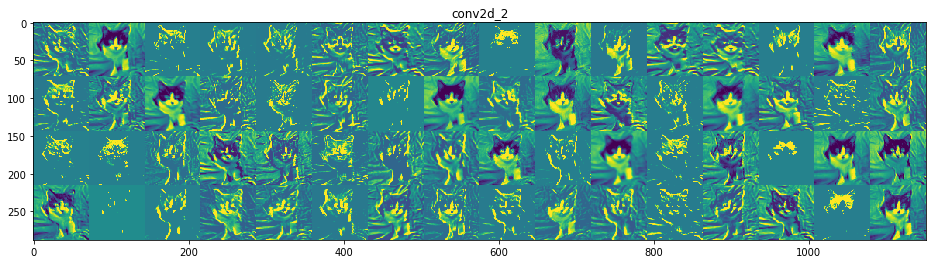

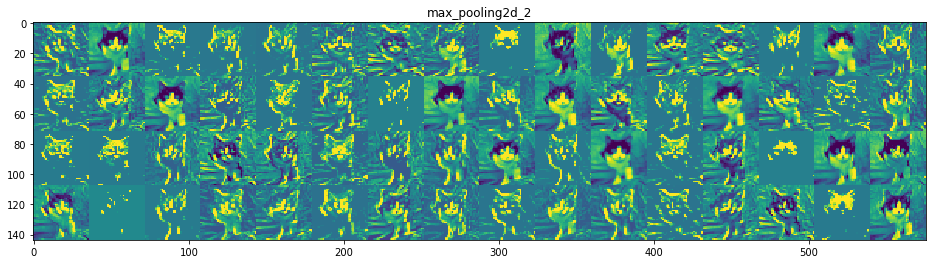

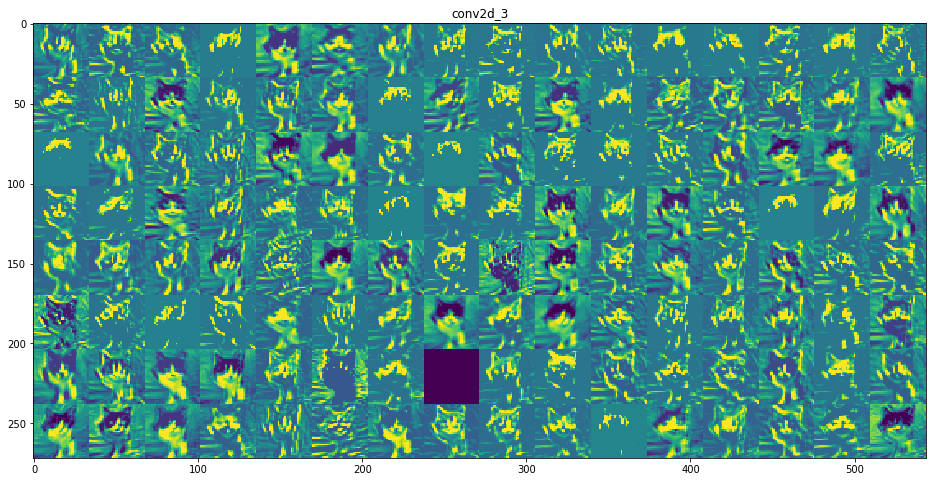

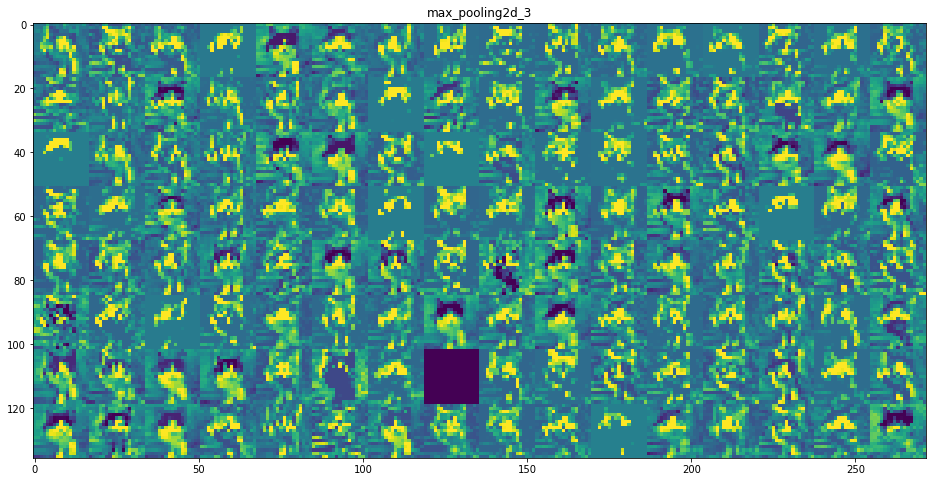

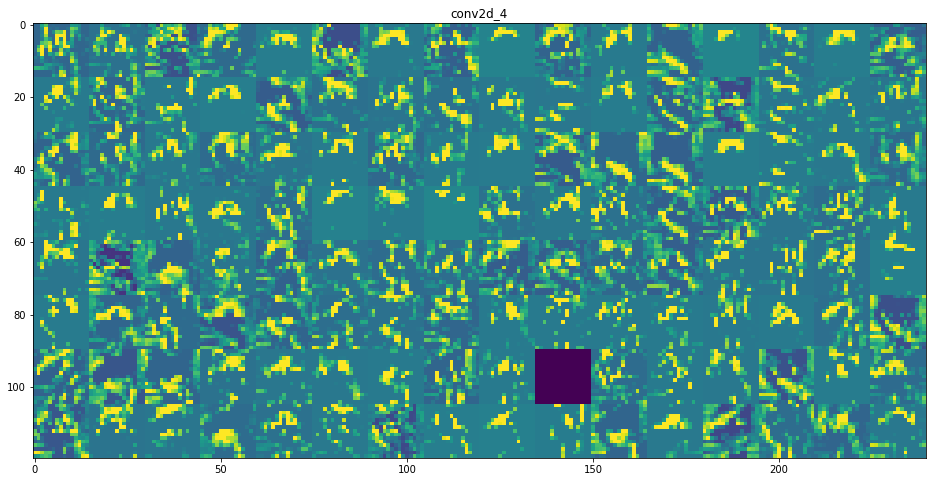

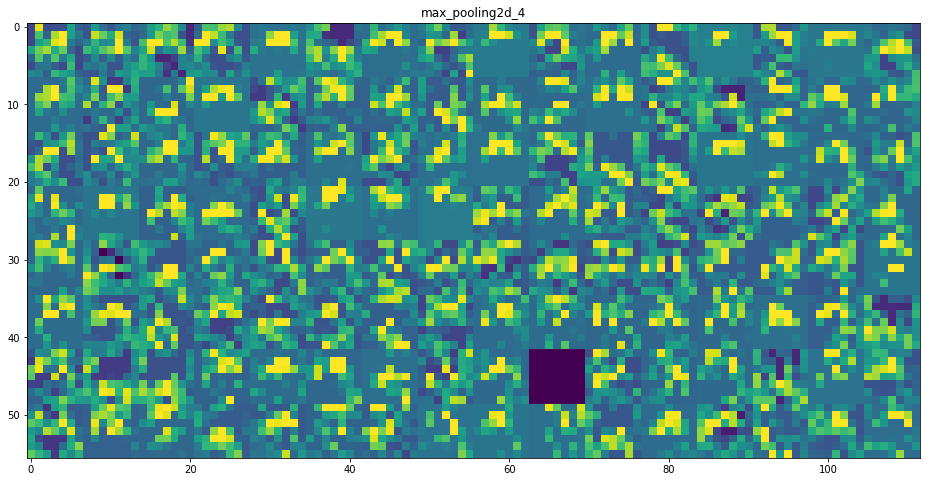

In [88]:
for layer_name, layer_activation in zip(layer_names, activation):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
   
    n_cols = n_features 
    display_grid = np.zeros((size * (n_cols//images_per_row), images_per_row * size))
    print(layer_name)
    for col in range(n_cols//images_per_row):
#         print(col,'________________________')
        for row in range(images_per_row):
#             print(row)
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image/=channel_image.std()
            channel_image *= 64
            channel_image +=128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,
                        row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
            